# **LIBRERIAS**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

# **BASE DE DATOS**

In [15]:
from google.colab import files
uploaded=files.upload()

Saving winequality-red.csv to winequality-red (1).csv


In [16]:
#Loading data:
data=pd.read_csv("winequality-red.csv",delimiter=";")
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [128]:
max(data["quality"])

8

In [129]:
min(data["quality"])

3

In [17]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [34]:
# Outlier detection 
from collections import Counter
def detect_outliers(df,n,features):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than n outliers according
    to the Tukey method.
    """
    outlier_indices = []
    
    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers

In [35]:
# detect outliers from Age, SibSp , Parch and Fare
Outliers_to_drop = detect_outliers(data.select_dtypes(include=np.number),2,data.select_dtypes(include=np.number).columns[:-1])

In [36]:
data.loc[Outliers_to_drop] # Show the outliers rows

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
510,8.2,0.39,0.49,2.3,0.099,47.0,133.0,0.9979,3.38,0.99,9.8,5


# **DIAGRAMA DE CAJA Y BIGOTE**

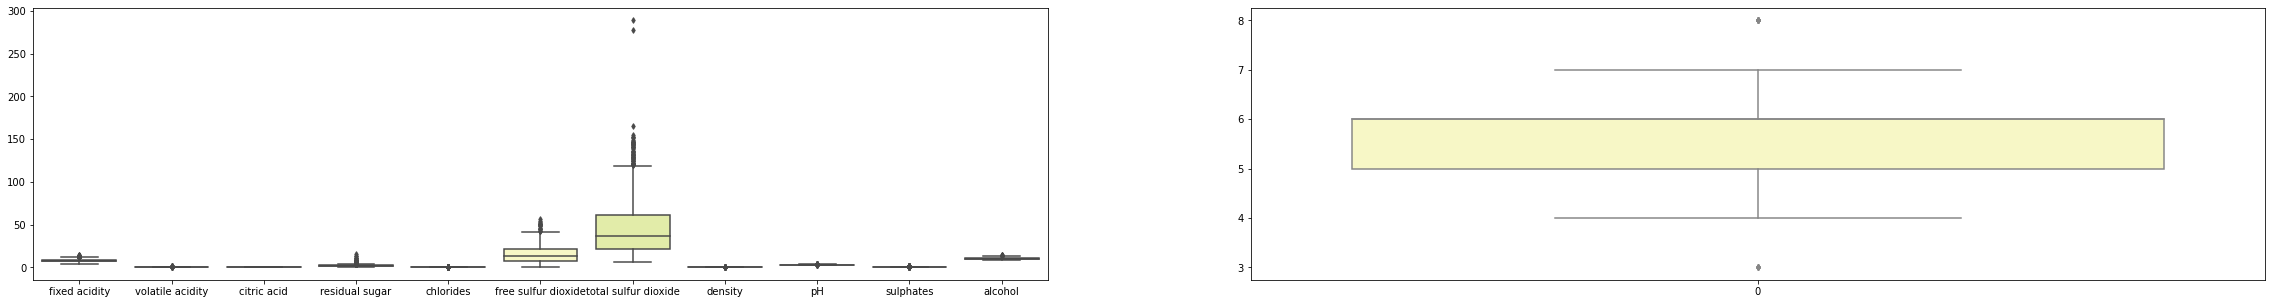

In [41]:
plt.figure(figsize=(40,5))
plt.subplot(121)
sb.boxplot(data=data[data.columns[:-1]],fliersize=4,palette="Spectral")
plt.subplot(122)
sb.boxplot(data=data["quality"],fliersize=4,palette="Spectral")

plt.show()

In [42]:
# Drop outliers
data = data.drop(Outliers_to_drop, axis = 0).reset_index(drop=True)
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1559,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1560,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1561,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1562,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


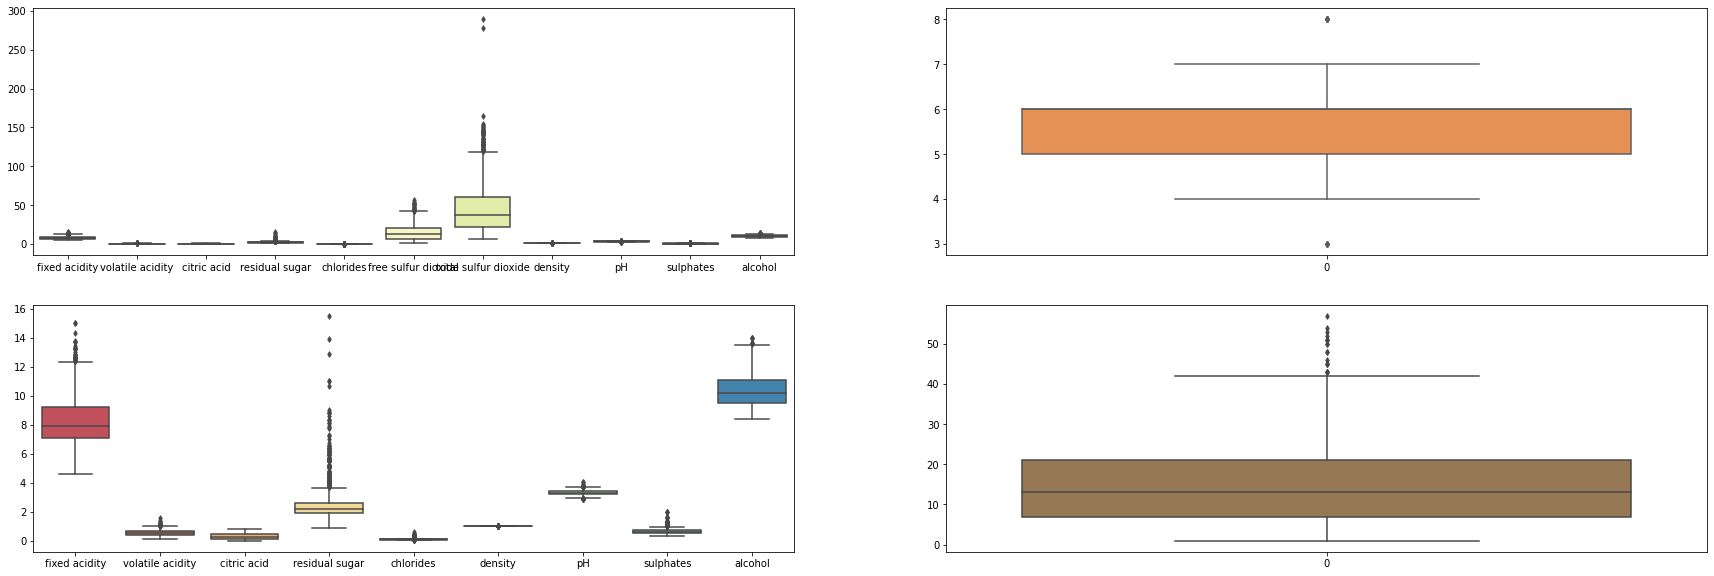

In [69]:
plt.figure(figsize=(30,10))
plt.subplot(221)
sb.boxplot(data=data[data.columns[:-1]],fliersize=4,palette="Spectral")
plt.subplot(222)
sb.boxplot(data=data["quality"],fliersize=4,palette="Oranges_r")
plt.subplot(223)
data0=data.drop(columns=["total sulfur dioxide","free sulfur dioxide"])
sb.boxplot(data=data0[data0.columns[:-1]],fliersize=4,palette="Spectral")
plt.subplot(224)
sb.boxplot(data=data["free sulfur dioxide"],fliersize=4,palette="cubehelix")

plt.show()

In [44]:
Outliers_to_drop = detect_outliers(data.select_dtypes(include=np.number),2,data.select_dtypes(include=np.number).columns[:-1])

In [56]:
Outliers_to_drop

[]

In [54]:
# Fill empty and NaNs values with NaN
data=data.fillna(np.nan)
# Check for Null values
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [68]:
# Summarie and statistics (again)
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1564.000000,1564.000000,1564.000000,1564.000000,1564.000000,1564.000000,1564.000000,1564.000000,1564.000000,1564.000000,1564.000000,1564.00000
mean,8.282928,0.527430,0.267877,2.466528,0.086341,15.545396,45.679028,0.996692,3.313050,0.654808,10.414162,5.63555
std,1.663606,0.179978,0.192409,1.203481,0.044077,9.833800,32.241673,0.001780,0.150506,0.164429,1.042020,0.80635
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.860000,0.330000,8.400000,3.00000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.00000
50%,7.900000,0.520000,0.255000,2.200000,0.079000,13.000000,37.000000,0.996700,3.310000,0.620000,10.200000,6.00000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997800,3.400000,0.720000,11.100000,6.00000
max,15.000000,1.580000,0.780000,15.500000,0.611000,57.000000,289.000000,1.002890,4.010000,1.980000,14.000000,8.00000


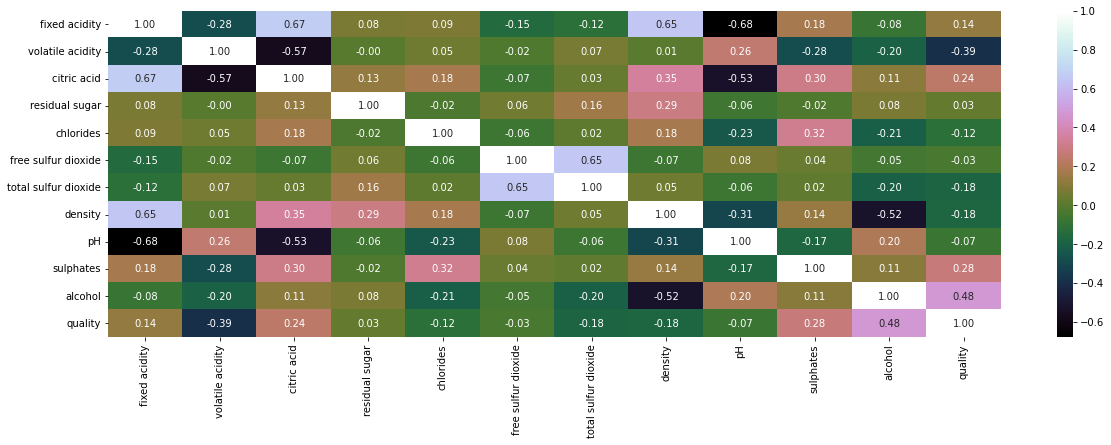

In [70]:
# Correlation matrix between numerical values
plt.figure(figsize=(20,6))
g = sb.heatmap(data.corr(),annot=True, fmt = ".2f", cmap = "cubehelix")
plt.show()

<Figure size 360x216 with 0 Axes>

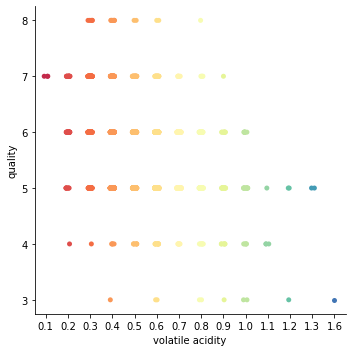

In [71]:
plt.figure(figsize=(5,3))
g = sb.catplot(x="volatile acidity",y="quality",data=data.round(1),kind="strip",height=5,aspect=1,palette="Spectral")
plt.show()

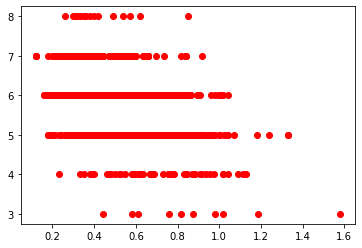

In [126]:
plt.scatter(data["volatile acidity"],data["quality"],color="red")
plt.show()

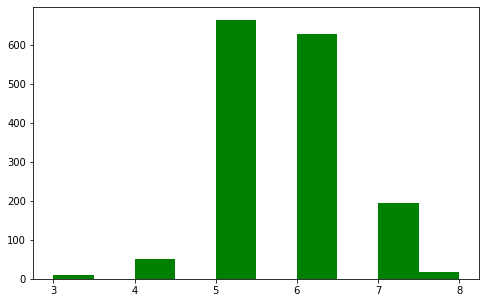

In [125]:
plt.figure(figsize=(8,5))
plt.hist(data["quality"],color="g")
plt.show()

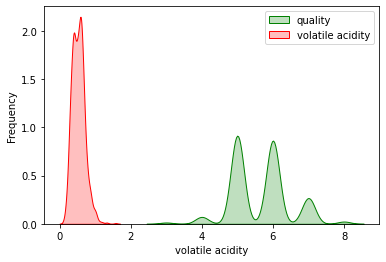

In [127]:
# Explore Age distibution 

g=sb.kdeplot(data["quality"],color="green",shade=True)
g.set_xlabel("quality")
g.set_ylabel("Frequency")

g=sb.kdeplot(data["volatile acidity"],color="red",shade=True)
g.set_xlabel("volatile acidity")
g.set_ylabel("Frequency")

g=g.legend(["quality","volatile acidity"])

In [ ]:
plt.figure(figsize=(30,10))
plt.subplot(221)
sb.boxplot(data=data[data.columns[:-1]],fliersize=4,palette="Spectral")
plt.subplot(222)
sb.boxplot(data=data["quality"],fliersize=4,palette="Oranges_r")
plt.subplot(223)
data0=data.drop(columns=["total sulfur dioxide","free sulfur dioxide"])
sb.boxplot(data=data0[data0.columns[:-1]],fliersize=4,palette="Spectral")
plt.subplot(224)
sb.boxplot(data=data["free sulfur dioxide"],fliersize=4,palette="cubehelix")

plt.show()

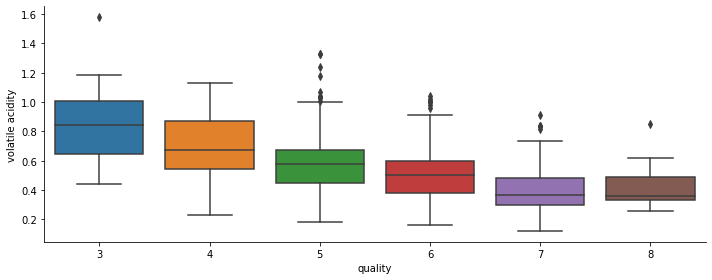

In [76]:
g=sb.catplot(x="quality",y="volatile acidity",data=data,kind="box",height=4,aspect=2.5)

# **MODELACIÓN**

In [77]:
from sklearn.model_selection import train_test_split

In [80]:
X=data.drop(columns="quality")
y=data["quality"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1432)

In [81]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier, HistGradientBoostingClassifier 
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor, BaggingRegressor, HistGradientBoostingRegressor 
from sklearn.ensemble import VotingClassifier, StackingClassifier, StackingRegressor, VotingRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, cross_validate
from sklearn.metrics import classification_report, accuracy_score, mean_squared_error
import sklearn
# Cross validate model with Kfold stratified cross val
kfold = StratifiedKFold(n_splits=5)

In [82]:
print(sorted(sklearn.metrics.SCORERS.keys()))

['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'max_error', 'mutual_info_score', 'neg_brier_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_gamma_deviance', 'neg_mean_poisson_deviance', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'neg_root_mean_squared_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'rand_score', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'roc_auc_ovo', 'roc_auc_ovo_weighted', 'roc_auc_ovr', 'roc_auc_ovr_weighted', 'top_k_accuracy', 'v_measure_score']


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selecti

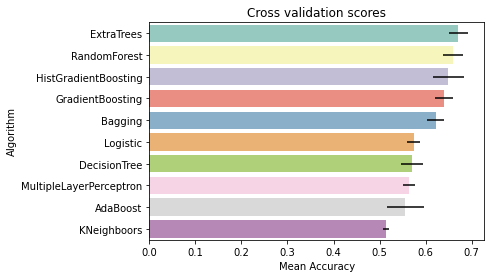

In [83]:
# Modeling step Test differents algorithms 
random_state = None
classifiers = []
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(random_state=random_state,learning_rate=0.1))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(BaggingClassifier(random_state=random_state))
classifiers.append(HistGradientBoostingClassifier(random_state=random_state))
classifiers.append(LogisticRegression(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))

cv_results, cv_results2 = [], []
for classifier in classifiers:
    cv_results.append(cross_val_score(classifier,X_train,y=y_train,scoring="accuracy",cv=kfold,n_jobs=4))
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)
    cv_results2.append(accuracy_score(y_pred,y_test))

cv_means = []
cv_std = []
cv_acc = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors":cv_std,"Accuracy":cv_results2,
                       "Algorithm":["RandomForest","AdaBoost","GradientBoosting","ExtraTrees","Bagging","HistGradientBoosting",
                                    "Logistic","KNeighboors","DecisionTree","MultipleLayerPerceptron"]})
cv_res=cv_res.sort_values(by="CrossValMeans",ascending=False)
g = sb.barplot("CrossValMeans","Algorithm",data=cv_res,palette="Set3",orient="h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

In [84]:
cv_res

,CrossValMeans,CrossValerrors,Accuracy,Algorithm
3,0.671465,0.019458,0.669246,ExtraTrees
0,0.659066,0.021470,0.673114,RandomForest
5,0.649478,0.014247,0.655706,HistGradientBoosting
2,0.639950,0.034059,0.669246,GradientBoosting
4,0.621805,0.017604,0.671180,Bagging
6,0.574067,0.023582,0.564797,Logistic
8,0.570175,0.039817,0.582205,DecisionTree
9,0.563522,0.006579,0.533849,MultipleLayerPerceptron
1,0.555890,0.021669,0.537718,AdaBoost
7,0.513821,0.012540,0.499033,KNeighboors


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=7.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or

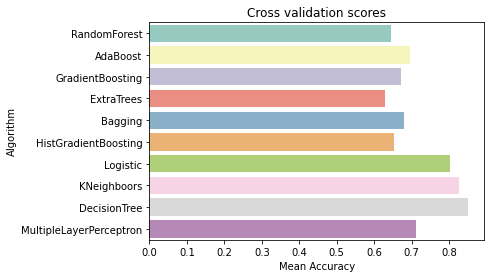

In [85]:
# Modeling step Test differents algorithms 
random_state = None
classifiers = []
classifiers.append(RandomForestRegressor(random_state=random_state))
classifiers.append(AdaBoostRegressor(random_state=random_state,learning_rate=0.1))
classifiers.append(GradientBoostingRegressor(random_state=random_state))
classifiers.append(ExtraTreesRegressor(random_state=random_state))
classifiers.append(BaggingRegressor(random_state=random_state))
classifiers.append(HistGradientBoostingRegressor(random_state=random_state))
classifiers.append(LogisticRegression(random_state=random_state))
classifiers.append(KNeighborsRegressor())
classifiers.append(DecisionTreeRegressor(random_state=random_state))
classifiers.append(MLPRegressor(random_state=random_state))

cv_results, cv_results2 = [], []
for classifier in classifiers:
    cv_results.append(cross_validate(classifier,X_train,y_train,cv=7,scoring="r2",n_jobs=-1))
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)
    cv_results2.append(np.sqrt(mean_squared_error(y_pred,y_test)))
    cv_results.append(cv_results)

cv_res = pd.DataFrame({"RMSE":cv_results2,
                       "Algorithm":["RandomForest","AdaBoost","GradientBoosting","ExtraTrees","Bagging","HistGradientBoosting",
                                    "Logistic","KNeighboors","DecisionTree","MultipleLayerPerceptron"]})
#cv_res=cv_res.sort_values(by="CrossValMeans",ascending=False)
g = sb.barplot("RMSE","Algorithm",data=cv_res,palette="Set3",orient="h")
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

# **COMBINANDO MODELOS**

**problema de clasificacion**

In [170]:
EXT = ExtraTreesClassifier()
EXT.fit(X_train,y_train)

RFC = RandomForestClassifier()
RFC.fit(X_train,y_train)

HGB=HistGradientBoostingClassifier()
HGB.fit(X_train,y_train)

GB=GradientBoostingClassifier()
GB.fit(X_train,y_train)

pred_EXT=EXT.predict(X_test)
pred_RFC=RFC.predict(X_test)
pred_HGB=HGB.predict(X_test)
pred_GB=GB.predict(X_test)

In [172]:
for i,j in zip([pred_RFC,pred_HGB,pred_EXT,pred_GB],["RFC","HGB","EXT","GB"]):
    print("RMSE for ",j,"is ",np.sqrt(mean_squared_error(i,y_test)))

RMSE for  RFC is  0.7050522292956858
RMSE for  HGB is  0.7566596653249027
RMSE for  EXT is  0.7226643160784095
RMSE for  GB is  0.7332923029375045


# **ENSAMBLE POR VOTING**

In [174]:
#voting : {'hard', 'soft'}
votingC = VotingClassifier(estimators=[('rfc', RFC),('hgb', HGB),('gb',GB),('EXT',EXT)], voting='soft', n_jobs=4)
votingC = votingC.fit(X_train, y_train)
Rings_predicted_All_Voting = votingC.predict(X_test)

In [185]:
print("RMSE for Voting is ",np.sqrt(mean_squared_error(Rings_predicted_All_Voting,y_test)))

RMSE for Voting is  0.7319722437159756


## **ESAMBLE POR APILAMIENTO (STAKING)**

In [175]:
#stack_method : {'auto', 'predict_proba', 'decision_function', 'predict'}
stackingC = StackingClassifier(estimators=[('rfc', RFC),('hgb', HGB),('gb',GB),('EXT',EXT)], stack_method='auto', n_jobs=4)
stackingC = stackingC.fit(X_train, y_train)
Rings_predicted_All_Stacking = stackingC.predict(X_test)

In [184]:
print("RMSE for Stacking is ",np.sqrt(mean_squared_error(Rings_predicted_All_Stacking,y_test)))

RMSE for Stacking is  0.7009250588361418


In [181]:
def rmse(dat):
    return np.sqrt(mean_squared_error(dat,y_test))
resultados=pd.DataFrame()
resultados["Modelo"]=["RFC","EXTC","MLPC","Log","Voting","Stacking"]
resultados["RMSE"]=[rmse(pred_RFC),rmse(pred_EXTC),rmse(pred_MLPC),rmse(pred_Log),rmse(Rings_predicted_All_Voting),rmse(Rings_predicted_All_Stacking)]

In [183]:
resultados.T

,0,1,2,3,4,5
Modelo,RFC,EXTC,MLPC,Log,Voting,Stacking
RMSE,0.705052,0.627961,0.790416,0.803763,0.731972,0.700925


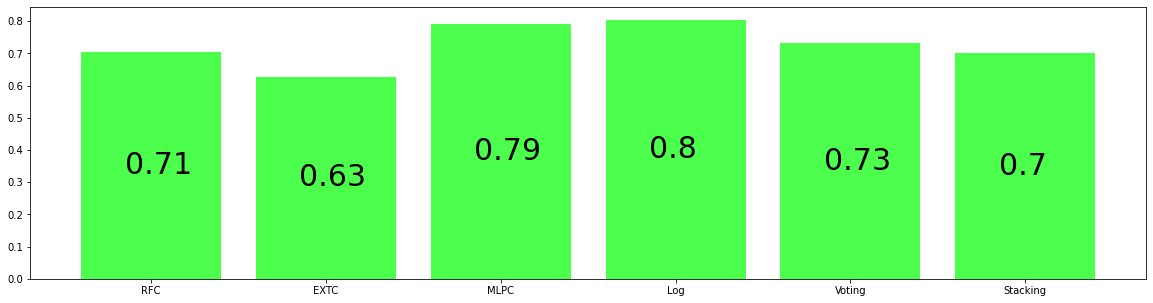

In [179]:
plt.figure(figsize=(20,5))
plt.bar(resultados["Modelo"],resultados["RMSE"],alpha=0.7,color="lime")
for i,j in enumerate(resultados["RMSE"]):
    plt.text(i-0.15,j/2,np.round(j,2),ma="center",va="center",fontsize=30,c="black")
plt.xticks(np.arange(0,6,1),resultados["Modelo"])

plt.show()

El mejor modelo de predicción es el EXTC (ExtraTreesClassifier) con un error de 0.636

los métodos de ensamblaje voting y stacking no mejorarn la predicción

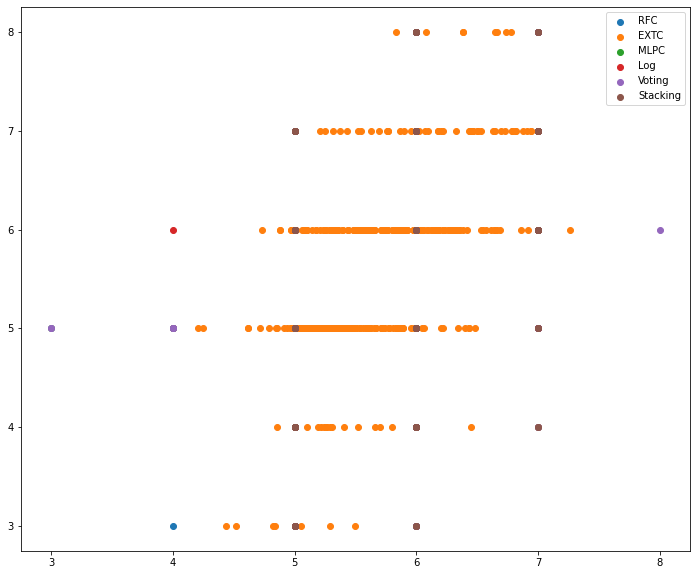

In [180]:
plt.figure(figsize=(12,10))
for i,j in zip([pred_RFC,pred_EXTC,pred_MLPC,pred_Log,Rings_predicted_All_Voting,Rings_predicted_All_Stacking],["RFC","EXTC","MLPC","Log","Voting","Stacking"]):
    plt.scatter(i,y_test, label=j)
    plt.legend()
plt.show()